## Лабараторная №5

Выканаў __Трафімаў Аляксандр__

-------

5.Порядко-статистические фильтры

Реализовать порядково-статистический фильтр и проиллюстрировать результаты его применения для бинарных и полутоновых изображений и квадратных окон размера 3x3, 5x5, 7x7.

In [1]:
import skimage
from skimage import morphology as skmorph
from scipy.ndimage import morphology as ndmorph
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm as tqdm_nb

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['figure.titlesize'] = 17

def show_images(images, titles=None, cols=3, width=7, height=7, to_show_axis=False):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    fig, ax = plt.subplots(
        rows, cols, figsize=(width * cols, height * rows), squeeze=False)
    ax_flatten = ax.flatten()
    
    if titles is not None:
        if not len(images) == len(titles):
            raise ValueError('images and title must have the same len')
    
    for i in range(len(images)):
        ax_flatten[i].imshow(images[i]);
        if not to_show_axis: ax_flatten[i].axis('off')
        if titles is not None: ax_flatten[i].set_title(titles[i])
    for i in range(len(images), len(ax_flatten)):
        ax_flatten[i].set_visible(False)
    fig.tight_layout()
    fig.subplots_adjust(top=(0.85 if titles is not None else 0.95))
    return fig, ax

(512, 512) (512, 512)


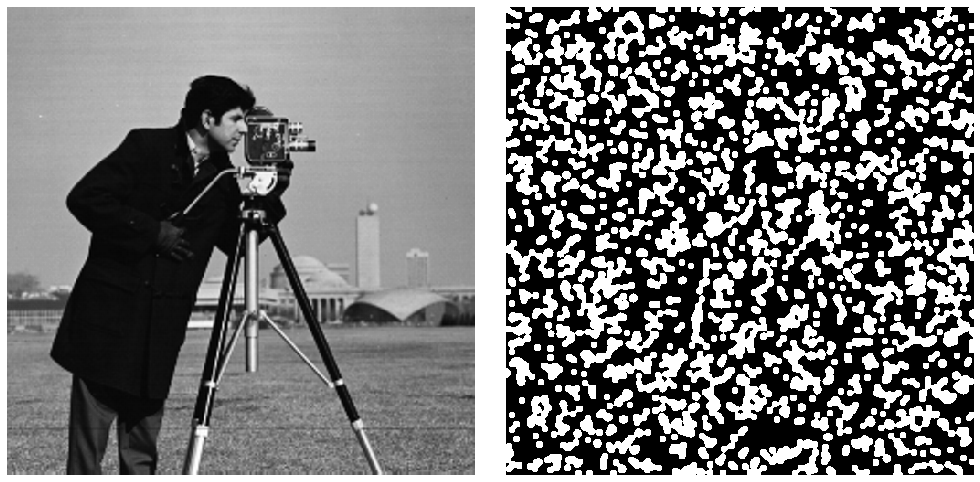

In [2]:
camera = skimage.data.camera()
blobs = skimage.data.binary_blobs(volume_fraction=0.4, blob_size_fraction=0.02)
print(camera.shape, blobs.shape)

show_images([camera, blobs], cols=2);

## define filter

In [3]:
def os_filter(img, ws, k):
    res = np.zeros_like(img)
    img_p = np.pad(img, ws // 2)

    for x in range(img_p.shape[0] - ws + 1):
        for y in range(img_p.shape[1] - ws + 1):
            sub = img_p[x:x+ws, y:y+ws]
    #         print(sub)
            sf = sorted(sub.flatten(), reverse=True)
    #         print(sf)
            res[x, y] = sf[k - 1]

    return res

## test filter for greyscale image

In [4]:
ok = []
for order in tqdm_nb([3, 5, 7, 9]):
    os_1 = os_filter(camera, order, 1)
    dilation = skmorph.dilation(camera, np.ones((order, order)))
    ok.append(np.array_equal(os_1, dilation))
print(f'1-statistic filter matched dilation: {all(ok)}')


1-statistic filter matched dilation: True


In [5]:
diffs_erosion = []
for order in tqdm_nb([3, 5, 7, 9]):
    os_last = os_filter(camera, order, order*order)
    eroded = skmorph.erosion(camera, np.ones((order, order)))
    diffs_erosion.append(((eroded - os_last) == 0).astype(np.uint8))

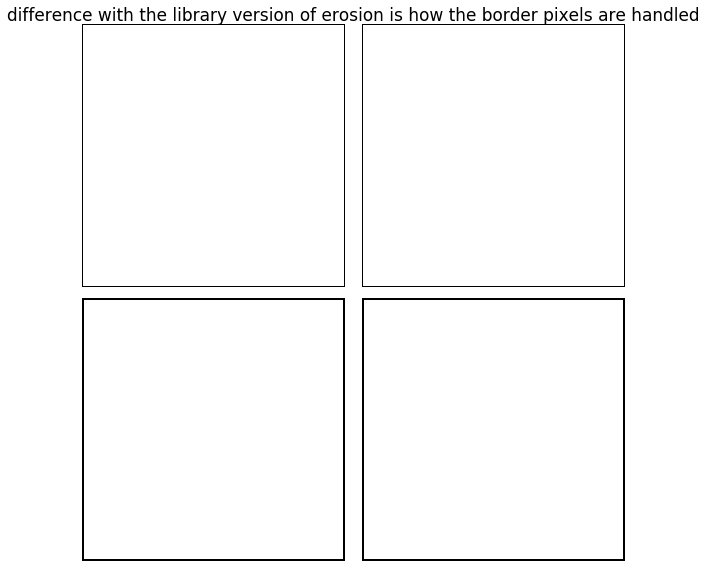

In [6]:
fig, ax = show_images(diffs_erosion, cols=2, width=4, height=4)
fig.suptitle('difference with the library version of erosion is how the border pixels are handled');

## test filter for binary image

In [7]:
ok = []
for order in tqdm_nb([3, 5, 7, 9]):
    os_1 = os_filter(blobs, order, 1)
    dilation = skmorph.binary_dilation(blobs, np.ones((order, order)))
    ok.append(np.array_equal(os_1, dilation))
print(f'1-statistic filter matched dilation: {all(ok)}')


1-statistic filter matched dilation: True


In [8]:
diffs_erosion = []
for order in tqdm_nb([3, 5, 7, 9]):
    os_last = os_filter(blobs, order, order*order)
    eroded = skmorph.erosion(blobs, np.ones((order, order)))
    diffs_erosion.append(np.logical_xor(os_last, eroded))

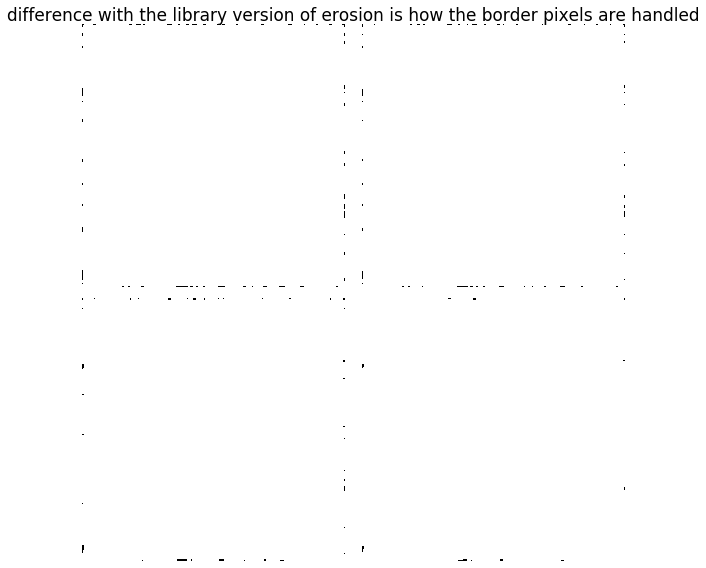

In [9]:
diffs_erosion_inverted = [~x for x in diffs_erosion]
fig, ax = show_images(diffs_erosion_inverted, cols=2, width=4, height=4)
fig.suptitle('difference with the library version of erosion is how the border pixels are handled');

## view results

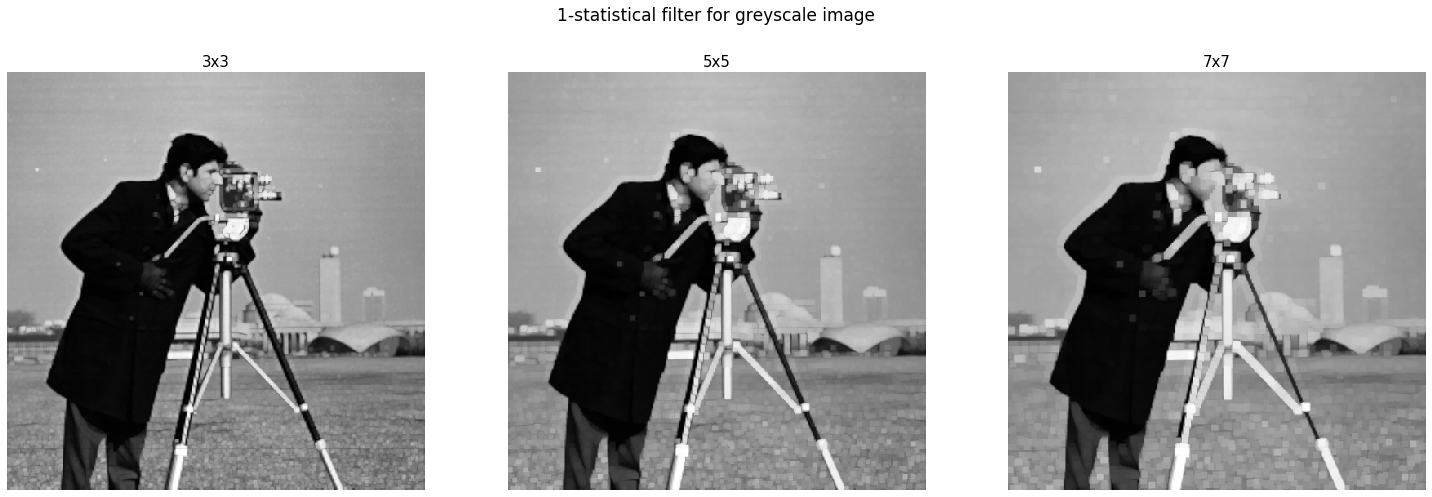

In [10]:
fig, ax = show_images(
    [os_filter(camera, x, 1) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('1-statistical filter for greyscale image');

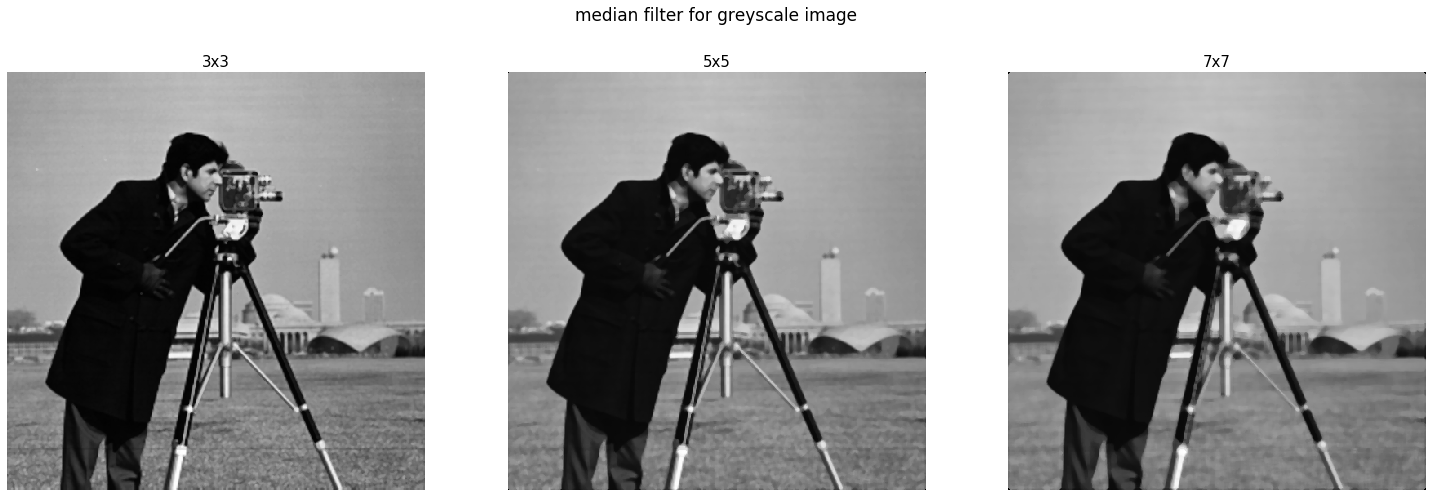

In [11]:
fig, ax = show_images(
    [os_filter(camera, x, x * x // 2) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('median filter for greyscale image');

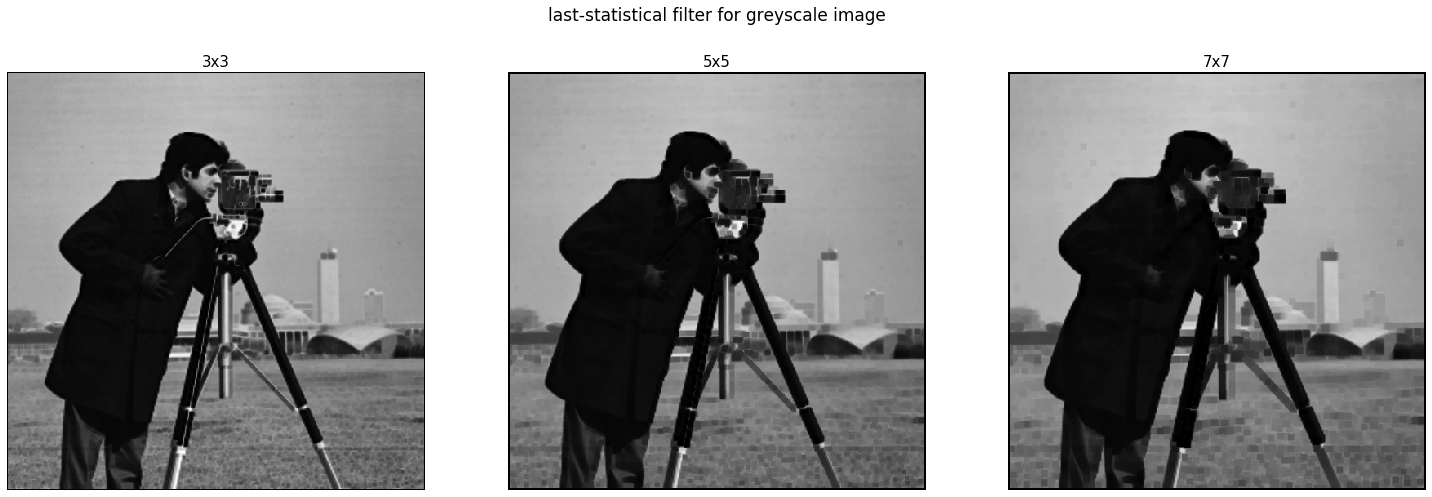

In [12]:
fig, ax = show_images(
    [os_filter(camera, x, x * x) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('last-statistical filter for greyscale image');

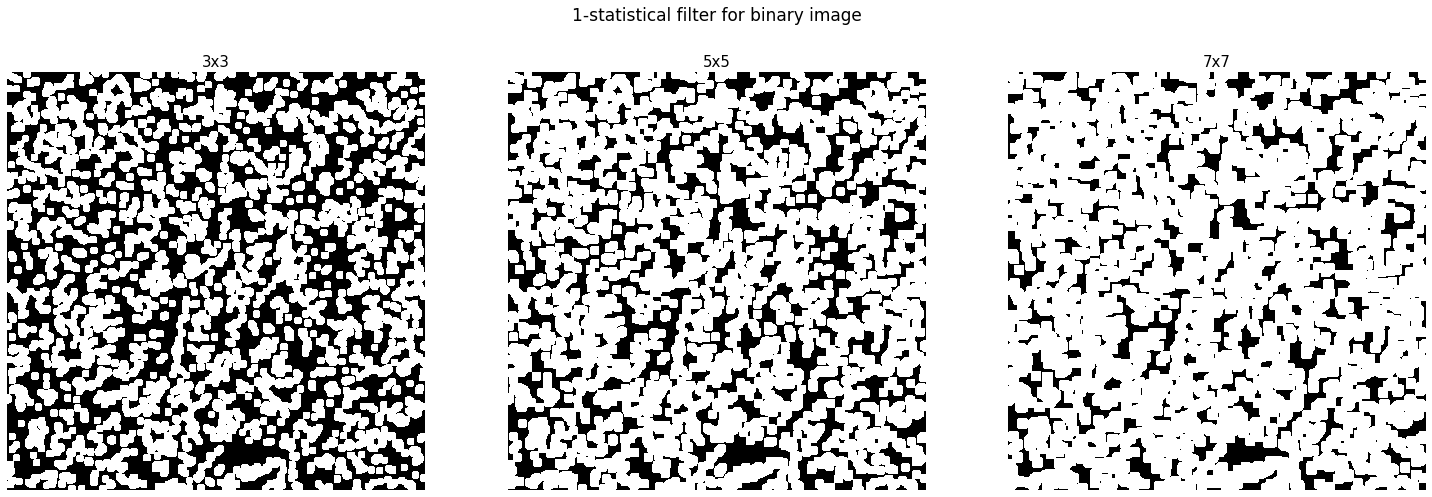

In [13]:
fig, ax = show_images(
    [os_filter(blobs, x, 1) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('1-statistical filter for binary image');

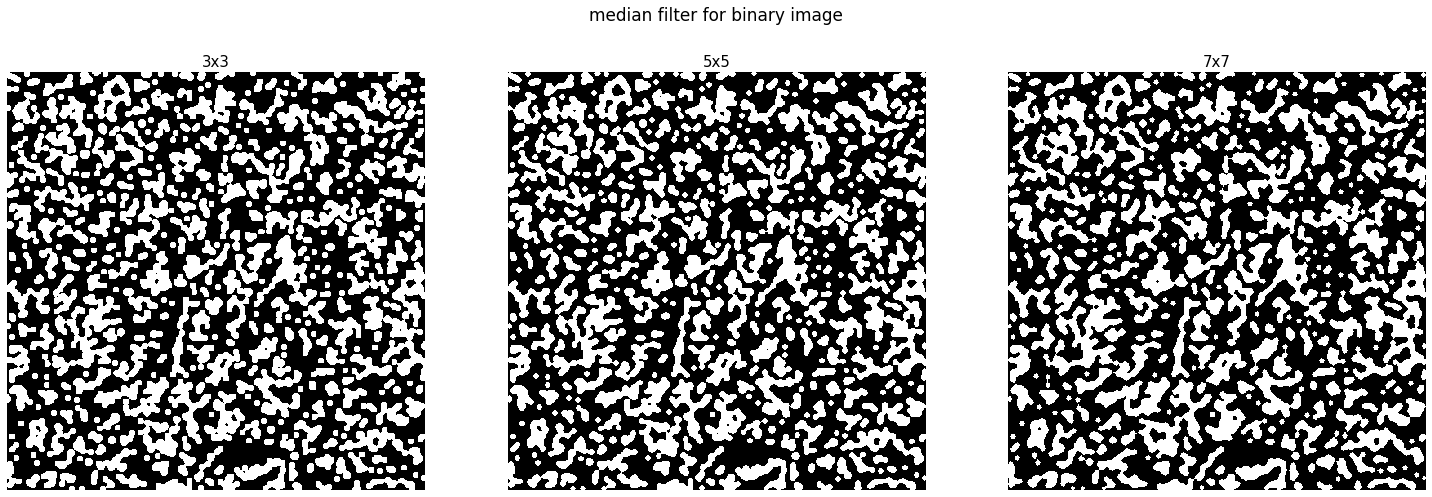

In [14]:
fig, ax = show_images(
    [os_filter(blobs, x, x * x // 2) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('median filter for binary image');

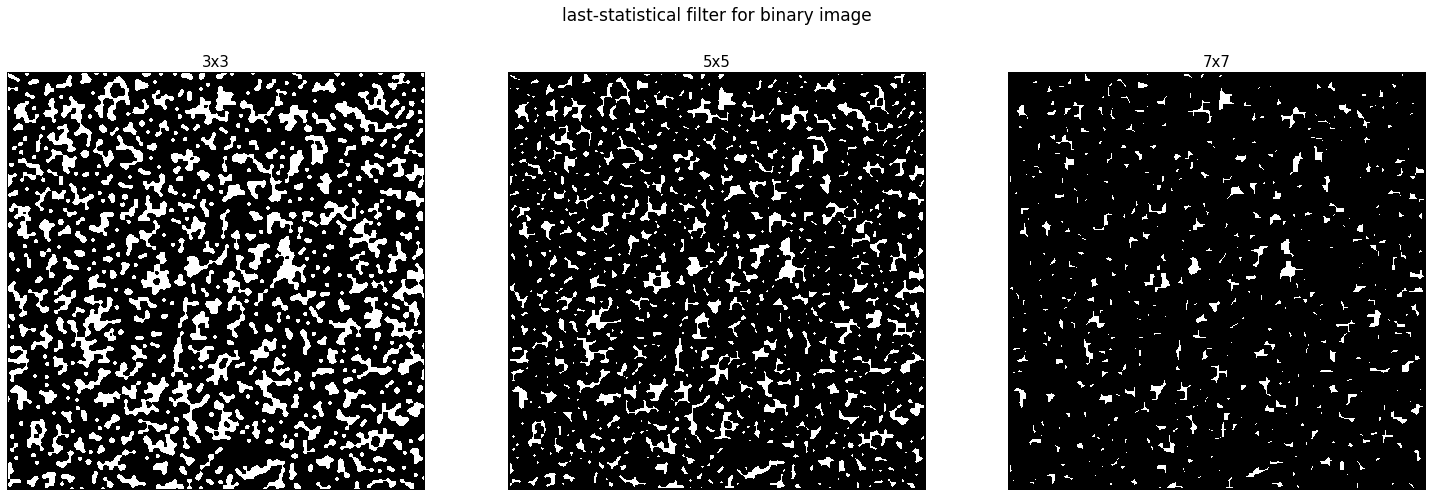

In [15]:
fig, ax = show_images(
    [os_filter(blobs, x, x*x) for x in [3, 5, 7]],
    titles=[f'{x}x{x}' for x in [3, 5, 7]],
    cols=3);
fig.suptitle('last-statistical filter for binary image');